In [1]:
from sklearn.datasets import fetch_lfw_people
import numpy as np

##  Load ifw people dataset

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
# the label to predict is the id of the person
y = lfw_people.target
print(np.unique(y, return_counts = True))
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("n_classes: %d" % n_classes)
print(target_names)

print("Image shape")
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

X = lfw_people.data
print(X.shape)
n_features = X.shape[1]
print(n_features)


(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([ 77, 236, 121, 530, 109,  71, 144], dtype=int64))
n_classes: 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
Image shape
1288 50 37
(1288, 1850)
1850


In [66]:
target_names[y]

array(['Hugo Chavez', 'Tony Blair', 'George W Bush', ..., 'Hugo Chavez',
       'George W Bush', 'Hugo Chavez'], dtype='<U17')

## Plot the images from the dataset

In [71]:
import matplotlib.pyplot as plt
def plot_grid(images,titles,h,w,rows=3, cols=3):
    
    plt.figure(figsize=(2*cols, 2*rows))
   
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i].reshape(h,w),cmap="gray")
        plt.title(titles[i])
        
    plt.tight_layout()

(1288, 50, 37)


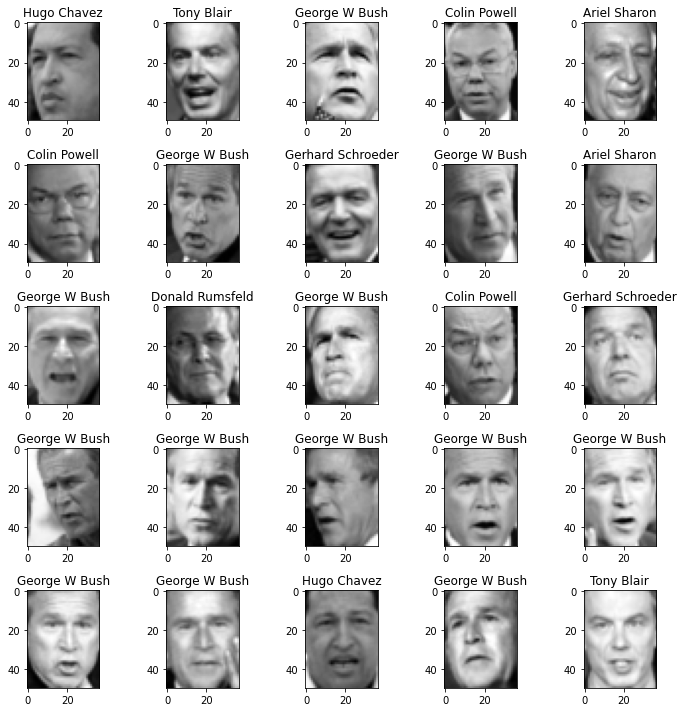

In [72]:
images = lfw_people.images
print(images.shape)
plot_grid(X,target_names[y],h,w, 5, 5)

## Split the dataset into Train and Test


In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(1159, 1850)
(129, 1850)


## Dimensionality Reduction using PCA

In [92]:
from sklearn.decomposition import PCA
p = PCA(n_components=500)
p.fit(X_train)
print("Transformed Shape:" , p.transform(X_train).shape)


Transformed Shape: (1159, 500)


In [93]:
cmp = p.components_
print(cmp.shape)

(500, 1850)


In [94]:
var_sum = np.sum(p.explained_variance_)
print("Sum of explained Variance", var_sum)
sorted_index = np.argsort(var)[::-1]


Sum of explained Variance 2575006.8


## Number of components that explanins 98% variance

In [99]:
temp_sum = 0
principal_vec = []
principal_val = []
i = 0
while (temp_sum < 0.98*var_sum):
    principal_vec.append(cmp[sorted_index[i],:])
    principal_val.append(var[sorted_index[i]])
    temp_sum += var[sorted_index[i]]
    i += 1
print("Number of components is {}", format(i))


Number of components is {} 229


In [100]:
principal_vec = np.matrix(principal_vec)
print(principal_vec.shape)

(229, 1850)


## Plot Eigen Faces

In [101]:
n_components = 228
mean_imgs = []
for i in range(n_components):
    v = principal_vec[i,:]
    img = v.reshape(h,w)
    mean_imgs.append(img)
mean_imgs = np.array(mean_imgs)
print(mean_imgs.shape)

(228, 50, 37)


In [102]:
titles =[ f"eigenvector-{i}" for i in range(n_components)]
len(titles)


228

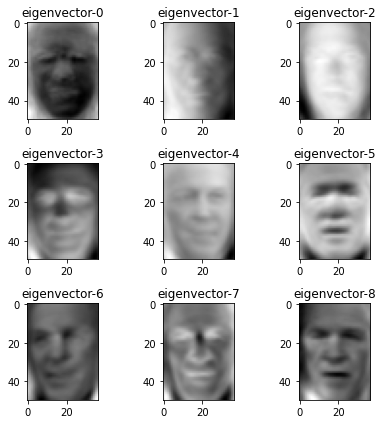

In [103]:
plot_grid(mean_imgs, titles,h,w)

In [107]:
X_train_trans = np.dot(X_train,principal_vec.T)
X_test_trans = np.dot(X_test,principal_vec.T)
print("Train size before transformation", X_train.shape)
print("Train size after transformation", X_train_trans.shape)

print("Test size before transformation", X_test.shape)
print("Test size after transformation", X_test_trans.shape)

Train size before transformation (1159, 1850)
Train size after transformation (1159, 229)
Test size before transformation (129, 1850)
Test size after transformation (129, 229)


In [114]:
## Classification Model

In [112]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(256,),batch_size=128,verbose=True,early_stopping=True)
classifier.fit(X_train_trans,y_train)

C:\Users\venka\miniconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Iteration 1, loss = 10.77097746
Validation score: 0.301724
Iteration 2, loss = 8.75281673
Validation score: 0.474138
Iteration 3, loss = 5.98967501
Validation score: 0.465517
Iteration 4, loss = 4.60511570
Validation score: 0.465517
Iteration 5, loss = 3.96159367
Validation score: 0.603448
Iteration 6, loss = 2.55608271
Validation score: 0.637931
Iteration 7, loss = 2.07394619
Validation score: 0.620690
Iteration 8, loss = 1.57904123
Validation score: 0.672414
Iteration 9, loss = 1.19436858
Validation score: 0.724138
Iteration 10, loss = 0.77298124
Validation score: 0.672414
Iteration 11, loss = 0.50268404
Validation score: 0.715517
Iteration 12, loss = 0.39243066
Validation score: 0.681034
Iteration 13, loss = 0.30593241
Validation score: 0.698276
Iteration 14, loss = 0.25943733
Validation score: 0.672414
Iteration 15, loss = 0.18863507
Validation score: 0.698276
Iteration 16, loss = 0.10174853
Validation score: 0.681034
Iteration 17, loss = 0.06991810
Validation score: 0.681034
Itera

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(256,),
              verbose=True)

## Prediction Metrics

In [113]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test_trans)
print(classification_report(y_test,y_pred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.57      0.53         7
     Colin Powell       0.86      0.81      0.83        31
  Donald Rumsfeld       0.54      0.70      0.61        10
    George W Bush       0.91      0.92      0.92        53
Gerhard Schroeder       0.64      0.64      0.64        11
      Hugo Chavez       0.75      0.50      0.60         6
       Tony Blair       0.50      0.45      0.48        11

         accuracy                           0.78       129
        macro avg       0.67      0.66      0.66       129
     weighted avg       0.78      0.78      0.78       129



C:\Users\venka\miniconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
